<a href="https://colab.research.google.com/github/JLuceroVasquez/visualizacion-de-datos-con-bibliotecas-de-python/blob/main/visualizacion_de_datos_con_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos con Python: Matplotlib, Seaborn y Plotly
En el curso se aprendió a crear visualizaciones con tres bibliotecas de Python: Matplotlib, Seaborn y Plotly.

Se asumió el rol de un analista de datos para una consultoría que presta servicios de migración para peruanos que desean viajar a Canadá. Se analizó un conjunto de datos con información histórica sobre la inmigración en Canadá desde 1980 hasta 2013.

In [2]:
#Se importa la biblioteca Pandas
import pandas as pd

##Conociendo la biblioteca Maplotlib

###Conociendo los datos
En esta primera sesión se cargó el dataframe con los datos de inmigración de 185 países a Canadá de 1980 a 2013. Se filtraron los datos del dataframe a fin de crear uno nuevo que contenga solo los datos de inmigración de Perú.

In [3]:
#Se asigna la dirección URL a una variable global.
url = 'https://github.com/JLuceroVasquez/visualizacion-de-datos-con-bibliotecas-de-python/raw/refs/heads/main/inmigrantes_canada.csv'

#Se cargaron los datos del archivo CSV a un dataframe.
df_inmigraciontotal = pd.read_csv(url)
df_inmigraciontotal.head()

,Pais,Continente,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argelia,África,Norte de África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [5]:
#Se conoce las dimensiones del dataframe.
df_inmigraciontotal.shape

(195, 38)

In [6]:
#Se establece como índice a la columna Pais, y modifica el dataframe original con el parámetro inplace.
df_inmigraciontotal.set_index(keys=['Pais'], inplace=True)

In [22]:
#Se crea una lista con los años de los paises como datos tipo texto.
'''
Se crea una lista (list) a partir de datos numéricos enteros entre 1980 y 2013
(el último número de range es exclusivo) que se convierten en texto aplicando
la función str con map a cada uno de los valores.
'''
anos = list(map(str, range(1980,2014)))

#Se crea una serie de Pandas donde los índices son los años y los valores de la serie son los datos de inmigración desde Perú.
serie_inmigracionperu = df_inmigraciontotal.loc['Perú', anos]
serie_inmigracionperu.head()

,Perú
1980,317
1981,456
1982,401
1983,241
1984,306


In [30]:
#Se crea un diccionario con la serie inmigracion Peru para su conversión futura a Dataframe.
'''
"serie_inmigracionperu.index" es un objeto tipo serie_inmigracionperu.index.
"serie_inmigracionperu.values" es un objeto tipo numpy.ndarray.
Aunque en este caso "list()" y "tolist()" parecen funcionar de la misma manera,
puede haber situaciones en las que una opción sea más adecuada que la otra.
'''
dict_inmigracionperu = {'Anos':list(serie_inmigracionperu.index),
                        'Peru':list(serie_inmigracionperu.values)}

df_inmigracionperu = pd.DataFrame(dict_inmigracionperu)
df_inmigracionperu.head()

,Anos,Peru
0,1980,317
1,1981,456
2,1982,401
3,1983,241
4,1984,306


###Creando el primer gráfico con Maplotlib
Se creó un gráfico de líneas con Matplotlib para visualizar la tendencia de inmigrantes colombianos a Perú. Importamos la biblioteca, creamos el gráfico con `plt.plot`, personalizamos el eje X con `plt.xticks`, ocultamos información adicional con `plt.show` y ajustamos el tamaño de la figura con `figsize`.

Se añadió títulos con `plt.title` y etiquetas en los ejes con `plt.xlabel` & `plt.ylabel` para una mejor comprensión.

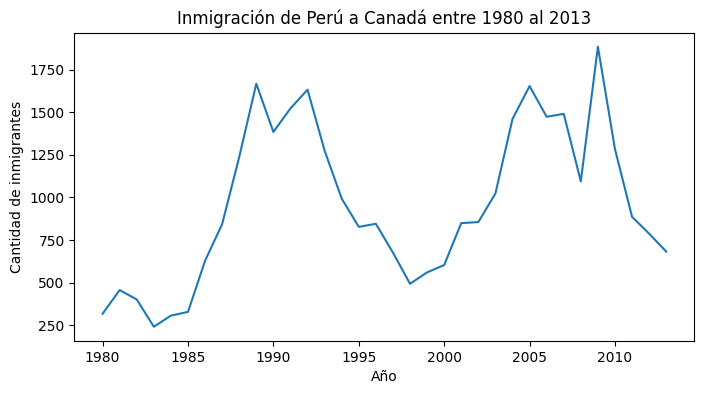

In [33]:
#Se importa la biblioteca
import matplotlib.pyplot as plt

#Se cambia las dimensiones de la figura. Las medidas están en pulgadas.
plt.figure(figsize=(8,4))

#Se grafica en un plano cartesiano los años como eje X, y los datos de inmigración en el eje Y.
plt.plot(df_inmigracionperu['Anos'], df_inmigracionperu['Peru'])

#Se limita la cantidad de etiquetas en el eje X.
anos_grafico1 = list(map(str, range(1980,2011,5)))
plt.xticks(anos_grafico1)

#Se añadió un título y etiquetas al gráfico.
plt.title('Inmigración de Perú a Canadá entre 1980 al 2013')
plt.xlabel('Año')
plt.ylabel('Cantidad de inmigrantes')

#Se muestra únicamente el gráfico.
plt.show()

###Desafío: comparando tendencias migratorias
Crear un gráfico de líneas comparando los números de inmigrantes de Brasil y Argentina a Canadá, los dos países más grandes de Sudamérica.

Por lo tanto, explora las diversas posibilidades y recuerda los elementos esenciales de un gráfico: título, etiquetas en los ejes x e y y las marcas del eje x, que deben definirse cada 5 años.

Además, tendrás que descubrir cómo agregar una leyenda para poder identificar la línea de cada país. Siguiendo estas instrucciones, habrás construido un gráfico sólido que te permitirá un análisis significativo y profundo.

In [53]:
#Se crea un dataframe con los datos de inmigración de Brasil y Argentina.
'''
Se transpuso el dataframe resultante, pues mantenía como filas los datos de
inmigración de Brasil y Argentina, y como columnas los años.
'''
df_inmigracion_brarg = df_inmigraciontotal.loc[['Brasil','Argentina'], anos].T

#Se muestra el df creado.
df_inmigracion_brarg.head()

Pais,Brasil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


In [54]:
#Se quita el nombre del índice de columnas 'Pais'.
df_inmigracion_brarg.rename_axis(None, axis=1, inplace=True)
df_inmigracion_brarg.head()

,Brasil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


In [55]:
#Se resetea el índice, y nombra al antiguo indice como la columna 'Anos'.
df_inmigracion_brarg.reset_index(inplace=True, names='Anos')
df_inmigracion_brarg.head()

,Anos,Brasil,Argentina
0,1980,211,368
1,1981,220,426
2,1982,192,626
3,1983,139,241
4,1984,145,237


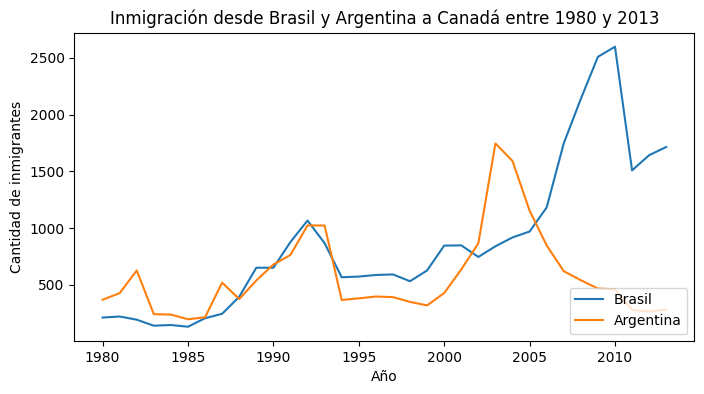

In [56]:
#Se establece el tamaño de la figura.
plt.figure(figsize=(8,4))

#Se grafican los datos en los ejes.
plt.plot(df_inmigracion_brarg['Anos'], df_inmigracion_brarg['Brasil'], label='Brasil')
plt.plot(df_inmigracion_brarg['Anos'], df_inmigracion_brarg['Argentina'], label='Argentina')

#Se añade una leyenda que toma de referencia el valor del parámetro label.
#Se solicita su ubicación en la esquina inferior derecha.
plt.legend(loc='lower right')

#Se restringe la cantidad de años que se mostrarán en el eje x.
plt.xticks(list(map(str,range(1980,2011,5))))

#Se añade un título y etiquetas a los ejes.
plt.title('Inmigración desde Brasil y Argentina a Canadá entre 1980 y 2013')
plt.xlabel('Año')
plt.ylabel('Cantidad de inmigrantes')

#Se muestra únicamente el gráfico.
plt.show()

Preguntas del desafío
1. ¿Hay alguna tendencia o patrón común en los datos de ambos países?

  Si existe una tendencia similar hasta principios del siglo XXI.
2. ¿Cuáles son los períodos con mayor número de inmigrantes en ambos países?

  Argentina alcanzó el mayor número de inmigrantes en el 2002 aprox., mientras que Brasil alcanzó el mayor número de inmigrante en 2009 aprox.

